# Overlap with other tools

## Benchmark comparison BUSCO vs fDOG-Assembly

In [1]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import numpy as np

In [2]:
tools_ref = ['bbh', 'domainoid', 'ensemble', 'hieranoid', 'inparanoid', 'metaphors', 'oma_pairs', 'orthoffgc', 'orthofinder', 'orthoinspector', 'panther', 'rsd', 'sonicparanoid']
tools = ['busco_metazoa_augustus_species_gallus_v2', 'busco_metazoa_metaeuk_gallus_v2', 'compleasm_metazoa_gallus_v2', 'fdog_assembly_metazoa_augustus_gallus_v2', 'fdog_assembly_metazoa_metaeuk_gallus_v2_sens'] #fdog_assembly_metazoa_metaeuk_gallus_v2_cov_30'
path = '../../results/qfo_input/'

In [3]:
def create_set_of_sets(path):
    file = open(path, 'r')
    pairs_set = set()
    lines = file.readlines()
    for line in lines:
        line = line.rstrip()
        pairs = frozenset(line.split('\t'))
        pairs_set.add(pairs)
    #print(len(lines))
    print(len(pairs_set))
    return pairs_set

In [4]:
list_of_sets_ref = []
dict_of_sets = {}
nr_orthologs_ref = []
for i in tools_ref:
    pairs_set = create_set_of_sets(path + i + '.tsv')
    list_of_sets_ref.append(pairs_set)
    dict_of_sets[i] = pairs_set
    nr_orthologs_ref.append(len(pairs_set))

8738
8945
8168
8422
8487
8979
7973
8616
9372
9006
8906
8606
9126


In [5]:
intersection_all = set.intersection(*list_of_sets_ref)
print(len(list_of_sets_ref))
print(len(intersection_all))

13
5669


In [6]:
list_of_sets = []
for t in tools:
    print(t)
    pairs_set = create_set_of_sets(path + t + '.tsv')
    list_of_sets.append(pairs_set)
    dict_of_sets[t] = pairs_set

busco_metazoa_augustus_species_gallus_v2
8588
busco_metazoa_metaeuk_gallus_v2
8621
compleasm_metazoa_gallus_v2
8714
fdog_assembly_metazoa_augustus_gallus_v2
8232
fdog_assembly_metazoa_metaeuk_gallus_v2_sens
8384


In [7]:
sensitivity_tools = []
nr_orthologs_tools = []
for i in range(len(tools)):
    print(tools[i])
    intersection_size = len(list_of_sets[i].intersection(intersection_all))
    print(intersection_size)
    print(intersection_size/len(intersection_all))
    sensitivity_tools.append(intersection_size/len(intersection_all))
    nr_orthologs_tools.append(len(list_of_sets[i]))

busco_metazoa_augustus_species_gallus_v2
5394
0.9514905627094725
busco_metazoa_metaeuk_gallus_v2
5402
0.9529017463397425
compleasm_metazoa_gallus_v2
5575
0.9834185923443288
fdog_assembly_metazoa_augustus_gallus_v2
5352
0.9440818486505557
fdog_assembly_metazoa_metaeuk_gallus_v2_sens
5347
0.9431998588816369


In [8]:
# Investigate pairs found exclusively by BUSCO or fDOG-Assembly Augustus
intersection_busco_aug = list_of_sets[0].intersection(intersection_all)
intersection_fdog_ass_aug = list_of_sets[2].intersection(intersection_all)
#print(intersection_busco_aug - intersection_fdog_ass_aug)
print(len(intersection_busco_aug - intersection_fdog_ass_aug))
print(len(intersection_fdog_ass_aug - intersection_busco_aug))

33
214


In [9]:
# Investigate pairs found exclusively by BUSCO MetaEuk or fDOG-Assembly MetaEuk
intersection_busco_meta = list_of_sets[1].intersection(intersection_all)
intersection_fdog_ass_meta = list_of_sets[3].intersection(intersection_all)
#print(intersection_busco_meta - intersection_fdog_ass_meta)
print(len(intersection_busco_meta - intersection_fdog_ass_meta))
print(len(intersection_fdog_ass_meta - intersection_busco_meta))

253
203


In [10]:
# Invetsigate genes that were not found by booth augustus
missing_busco_aug = intersection_all - list_of_sets[0]
missing_fdog_ass_aug = intersection_all - list_of_sets[2]
print(len(missing_busco_aug))
print(len(missing_fdog_ass_aug))
print(missing_busco_aug.intersection(missing_fdog_ass_aug))
print(len(missing_busco_aug.intersection(missing_fdog_ass_aug)))

missed_augustus = missing_busco_aug.intersection(missing_fdog_ass_aug)
with open("exclusive_gene_lists/exclusive_protein_based_pairs_augustus_tools.tsv", 'w') as out:
    for i in missed_augustus:
        a,b = i
        out.write(a + "\t" + b + "\n")

275
94
{frozenset({'Q9UJW0', 'Q9QUR2'}), frozenset({'F1NU56', 'P62851'}), frozenset({'Q0G841', 'O75575'}), frozenset({'Q20059', 'Q8TAF3'}), frozenset({'O95149', 'A0A1D5NZ24'}), frozenset({'Q14691', 'Q22019'}), frozenset({'T1EGP8', 'Q9Y5Q9'}), frozenset({'A0A1D5P7B5', 'P09001'}), frozenset({'A7SPN0', 'P51970'}), frozenset({'D3ZN43', 'Q330K2'}), frozenset({'Q5BKC6', 'Q96EW2'}), frozenset({'Q96CT7', 'A7RS85'}), frozenset({'O94874', 'Q5ZMG1'}), frozenset({'Q9H2W6', 'C0VXV6'}), frozenset({'F1M086', 'Q9VMQ7'}), frozenset({'B3CJ34', 'Q92616'}), frozenset({'P0C2W1', 'B4F739'}), frozenset({'Q5ZKU4', 'Q9H0H0'}), frozenset({'Q9UBB6', 'A7S6S1'}), frozenset({'P80361', 'Q9NR50'}), frozenset({'Q16595', 'F1P1P5'}), frozenset({'Q8CGU6', 'Q92542'}), frozenset({'O75586', 'A0A1L1RLU6'}), frozenset({'Q5HYK3', 'Q5ZLL5'}), frozenset({'P63272', 'A0A6I8SV11'}), frozenset({'Q9WTV5', 'O00233'}), frozenset({'Q5ZJT0', 'Q8IYB8'}), frozenset({'Q9HCU5', 'Q21115'}), frozenset({'Q96C86', 'Q8K4F7'}), frozenset({'Q94261'

In [11]:
# Invetsigate genes that were not found by booth metaeuk
missing_busco_meta = intersection_all - list_of_sets[1]
missing_fdog_ass_meta = intersection_all - list_of_sets[3]
print(len(missing_busco_meta))
print(len(missing_fdog_ass_meta))
print(missing_busco_aug.intersection(missing_fdog_ass_meta))
print(len(missing_busco_aug.intersection(missing_fdog_ass_meta)))

missed_metaeuk = missing_busco_meta.intersection(missing_fdog_ass_meta)
with open("exclusive_gene_lists/exclusive_protein_based_pairs_metaeuk_tools.tsv", 'w') as out:
    for i in missed_metaeuk:
        a,b = i
        out.write(a + "\t" + b + "\n")

267
317
{frozenset({'O95149', 'F6TAQ8'}), frozenset({'P62314', 'B2RZB7'}), frozenset({'A7RJ96', 'Q9BYD3'}), frozenset({'A0A1D5P7B5', 'P09001'}), frozenset({'Q9VEQ2', 'Q15006'}), frozenset({'T1G264', 'Q8N8A6'}), frozenset({'T1FM85', 'P49366'}), frozenset({'P56282', 'T1FST1'}), frozenset({'Q5ZHS3', 'Q13901'}), frozenset({'A0A8J0QZC8', 'P49754'}), frozenset({'T1G402', 'Q15050'}), frozenset({'Q99471', 'A7RUT5'}), frozenset({'F7DK45', 'Q9NQ89'}), frozenset({'Q96G21', 'D6X379'}), frozenset({'Q32P41', 'Q8IRE4'}), frozenset({'Q96A65', 'Q62824'}), frozenset({'Q688Z3', 'Q8TDD1'}), frozenset({'Q9P0J0', 'Q6PC49'}), frozenset({'O01901', 'Q9Y3C0'}), frozenset({'Q0G841', 'O75575'}), frozenset({'P61758', 'E1BXR1'}), frozenset({'Q5ZLP2', 'Q96GX9'}), frozenset({'G5EE80', 'P61011'}), frozenset({'Q9U3S3', 'Q6I9Y2'}), frozenset({'Q16595', 'F1P1P5'}), frozenset({'O94817', 'Q9VTU1'}), frozenset({'Q5HYK3', 'Q5ZLL5'}), frozenset({'D7EHR1', 'Q86XA0'}), frozenset({'Q96C86', 'Q8K4F7'}), frozenset({'Q8VHM6', 'O755

In [12]:
# gene found by fDOG-Assembly Augustus but not with fDOG-Assembly MetaEuk
missing_fdog_ass_aug = intersection_all - list_of_sets[2]
missing_fdog_ass_meta = intersection_all - list_of_sets[3]
print(len(missing_fdog_ass_aug))
print(len(missing_fdog_ass_meta))
print(missing_fdog_ass_aug.intersection(missing_fdog_ass_meta))
print(len(missing_fdog_ass_aug.intersection(missing_fdog_ass_meta)))

94
317
{frozenset({'Q96K37', 'P0C6B1'}), frozenset({'F1NU56', 'P62851'}), frozenset({'Q0G841', 'O75575'}), frozenset({'O45550', 'Q01658'}), frozenset({'T1EGP8', 'Q9Y5Q9'}), frozenset({'A0A1D5P7B5', 'P09001'}), frozenset({'A7SPN0', 'P51970'}), frozenset({'D3ZN43', 'Q330K2'}), frozenset({'Q5BKC6', 'Q96EW2'}), frozenset({'O94874', 'Q5ZMG1'}), frozenset({'Q13561', 'Q09248'}), frozenset({'Q9H2W6', 'C0VXV6'}), frozenset({'Q9UBB6', 'A7S6S1'}), frozenset({'Q16595', 'F1P1P5'}), frozenset({'O75586', 'A0A1L1RLU6'}), frozenset({'Q5HYK3', 'Q5ZLL5'}), frozenset({'P63272', 'A0A6I8SV11'}), frozenset({'Q9WTV5', 'O00233'}), frozenset({'Q5ZJT0', 'Q8IYB8'}), frozenset({'Q96C86', 'Q8K4F7'}), frozenset({'Q5ZHS3', 'Q13901'}), frozenset({'Q8VHM6', 'O75575'}), frozenset({'Q9BPX7', 'Q19987'}), frozenset({'Q9H6L2', 'T1EU95'}), frozenset({'O95900', 'Q9N3X3'}), frozenset({'T1G402', 'Q15050'}), frozenset({'Q9VMQ7', 'A0A803K7V3'}), frozenset({'P38024', 'P22234'}), frozenset({'Q5ZIE6', 'Q13564'}), frozenset({'P53701'

In [13]:
# Invetsigate genes that were not found by all assembly_based runs
missed_all = missed_augustus.intersection(missed_metaeuk)
print(len(missed_all))
with open("exclusive_gene_lists/exclusive_protein_based_pairs_all.tsv", 'w') as out:
    for i in missed_all:
        a,b = i
        out.write(a + "\t" + b + "\n")

34


In [14]:
sensitivity_ref = []
for ref in range(len(tools_ref)):
    #print(ref)
    print(tools_ref[ref])
    ref_list = list_of_sets_ref[:ref] + list_of_sets_ref[ref+1:]
    intersection_all_others = set.intersection(*ref_list)
    intersection_size = len(list_of_sets_ref[ref].intersection(intersection_all_others))
    print(intersection_size)
    print(len(intersection_all_others))
    print(intersection_size/len(intersection_all_others))
    sensitivity_ref.append(intersection_size/len(intersection_all_others))

bbh
5669
5683
0.9975365124054196
domainoid
5669
5669
1.0
ensemble
5669
6442
0.8800062092517852
hieranoid
5669
5728
0.989699720670391
inparanoid
5669
5677
0.9985908050026422
metaphors
5669
6035
0.9393537696768849
oma_pairs
5669
5957
0.9516535168709082
orthoffgc
5669
5841
0.97055298750214
orthofinder
5669
5686
0.9970102004924376
orthoinspector
5669
5676
0.9987667371388301
panther
5669
5791
0.9789328268002072
rsd
5669
5815
0.9748925193465177
sonicparanoid
5669
5671
0.9996473285134897


In [15]:
# some statistical stuff
#Standartabweichung
std_dev = np.std(sensitivity_ref)
print(std_dev)

0.033324602818674526


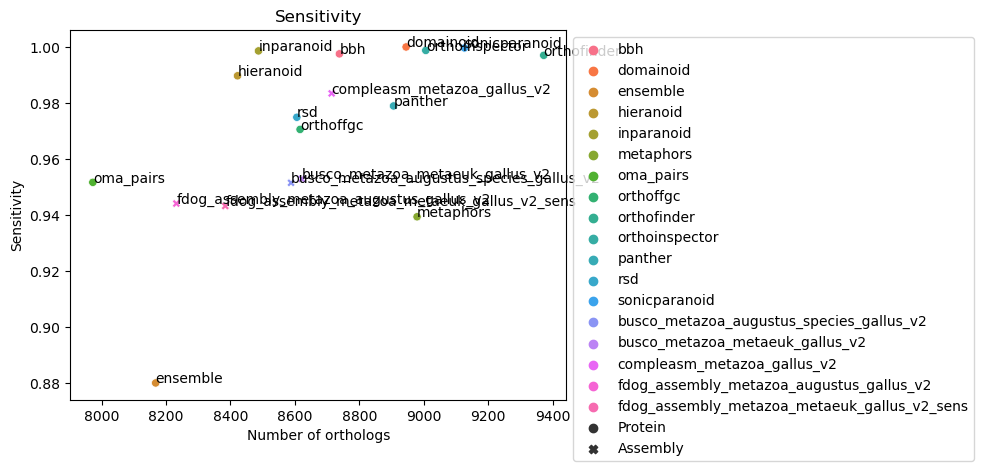

In [16]:
# Plot sensitivity 
tools_list = tools_ref + tools
sensitivity_list = sensitivity_ref + sensitivity_tools
base = []
nr_orthologs_list = nr_orthologs_ref + nr_orthologs_tools
for t in tools_list:
    if t in tools_ref:
        base.append('Protein')
    else:
        base.append('Assembly')
sensitivity_dict = {'tool': tools_list, 'sensitivity': sensitivity_list, 'nr_orthologs': nr_orthologs_list, 'base': base} 
sensitivity_df = pd.DataFrame(sensitivity_dict)
plt = sb.scatterplot(data=sensitivity_df, x="nr_orthologs", y="sensitivity", hue=tools_list, style=base)
sb.move_legend(plt, "upper left", bbox_to_anchor=(1, 1))

plt.set_title('Sensitivity')
#Set x-axis label
plt.set_xlabel('Number of orthologs')
#Set y-axis label
plt.set_ylabel('Sensitivity')


def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x']+0.02, point['y'], str(point['val']))

label_point(sensitivity_df.nr_orthologs, sensitivity_df.sensitivity, sensitivity_df.tool, plt.figure.gca())
plt.figure.savefig("Sensitivity_all_tools.svg", bbox_inches='tight')

In [17]:
#backup 06.05.24
315
342
#{frozenset({'A0A8J8XD13', 'Q99437'}), frozenset({'Q9NXG2', 'Q5M943'}), frozenset({'Q8IRE4', 'Q32P41'}), frozenset({'Q9VKJ4', 'Q9Y3B2'}), frozenset({'Q5M808', 'Q53FT3'}), frozenset({'A0A1D5PIR3', 'Q12768'}), frozenset({'Q9BTX3', 'A0A1D5PL82'}), frozenset({'F1NK93', 'Q9UJX4'}), frozenset({'P62851', 'F1NU56'}), frozenset({'A7SPN0', 'P51970'}), frozenset({'A0A8I6AE58', 'Q9GZN1'}), frozenset({'P51398', 'A7S9T5'}), frozenset({'Q99471', 'A7RUT5'}), frozenset({'T1FXS2', 'Q9Y2R4'}), frozenset({'Q19987', 'Q9BPX7'}), frozenset({'P51398', 'A0A0G2K264'}), frozenset({'Q9NZ43', 'Q9N598'}), frozenset({'A0A1D5PB45', 'Q969S3'}), frozenset({'A7RL51', 'O94923'}), frozenset({'Q99442', 'B2GUQ9'}), frozenset({'A0A1D5PWD8', 'P11182'}), frozenset({'P38024', 'P22234'}), frozenset({'Q6DHR8', 'Q96E22'}), frozenset({'Q9NQ89', 'A0A1D6UPU0'}), frozenset({'Q9BUE0', 'Q966M5'}), frozenset({'T1ECZ7', 'O95777'}), frozenset({'Q5ZKK4', 'Q14696'}), frozenset({'A0A1D5NWZ8', 'P52435'}), frozenset({'Q9V3T9', 'P22570'}), frozenset({'Q688Z3', 'Q8TDD1'}), frozenset({'F1NTL3', 'Q6AI08'}), frozenset({'A0A1L1RMC0', 'P25786'}), frozenset({'T1FUL4', 'O15091'}), frozenset({'Q9NXG2', 'O61900'}), frozenset({'P62314', 'B2RZB7'}), frozenset({'A0A0G2JWN4', 'Q5BKX5'}), frozenset({'Q53HI1', 'Q10045'}), frozenset({'Q92685', 'F1P0T5'}), frozenset({'B3DLX5', 'Q8N6T3'}), frozenset({'A0A3Q2TXQ2', 'Q9UBZ9'}), frozenset({'Q9BSU1', 'Q5ZKM4'}), frozenset({'Q9VMQ7', 'F1M086'}), frozenset({'P61758', 'E1BXR1'}), frozenset({'O94817', 'Q9VTU1'}), frozenset({'P61313', 'F1NQG5'}), frozenset({'Q15006', 'Q9VEQ2'}), frozenset({'Q561P4', 'Q9UJW0'}), frozenset({'O75586', 'A0A1L1RLU6'}), frozenset({'A4QNF8', 'Q9P0M9'}), frozenset({'Q13769', 'A0A1L1S0H5'}), frozenset({'T1FWH1', 'Q9NUY8'}), frozenset({'Q9H981', 'T1G220'}), frozenset({'E1C516', 'O94903'}), frozenset({'Q9H5U6', 'T1FMA3'}), frozenset({'Q96DI7', 'F1NUK8'}), frozenset({'Q3MHD2', 'F6X492'}), frozenset({'Q9UHA4', 'A0A452J856'}), frozenset({'F1NWG6', 'Q08AM6'}), frozenset({'Q9NZ63', 'D3ZKZ0'}), frozenset({'P41250', 'A0A1L1RX59'}), frozenset({'Q5F3N9', 'Q9H6K1'}), frozenset({'Q9H2G9', 'T1FA06'}), frozenset({'A0A1D5PY39', 'Q7Z3J2'}), frozenset({'Q9NVM9', 'A0A803J8A1'}), frozenset({'Q9U3S3', 'Q6I9Y2'}), frozenset({'A7SCU5', 'Q9BYC9'}), frozenset({'A0A8I5ZM35', 'Q8IYS2'}), frozenset({'G3V6U3', 'Q9H553'}), frozenset({'A0A1D5PGK2', 'Q9NWL6'}), frozenset({'P0C2W1', 'B4F739'}), frozenset({'A0A3Q2TU15', 'O95801'}), frozenset({'Q8INF2', 'Q96BW9'}), frozenset({'C0VXV6', 'Q9H2W6'}), frozenset({'A0AVI4', 'O17638'}), frozenset({'Q9BYD3', 'A7RJ96'}), frozenset({'D6WRF5', 'Q08J23'}), frozenset({'A0A1D5PY98', 'Q9GZZ9'}), frozenset({'P82912', 'B5DFS9'}), frozenset({'D3ZCD7', 'Q96S44'}), frozenset({'Q96EK5', 'Q5ZIL9'}), frozenset({'A0A1D5NW43', 'Q9BRG1'}), frozenset({'Q5EBE8', 'Q13347'}), frozenset({'P09001', 'A7SQV4'}), frozenset({'O00233', 'Q9WTV5'}), frozenset({'Q19906', 'Q2VPK5'}), frozenset({'Q0G841', 'O75575'}), frozenset({'Q5ZJE4', 'Q9H741'}), frozenset({'Q1L8Y7', 'Q9UQ13'}), frozenset({'O95149', 'A0A1D5NZ24'}), frozenset({'P50336', 'D3ZVN7'}), frozenset({'T1FMQ8', 'Q9BW27'}), frozenset({'Q8VHM6', 'O75575'}), frozenset({'P04843', 'E1C0F1'}), frozenset({'Q96DM3', 'A0A1D5P3A0'}), frozenset({'Q96A65', 'Q62824'}), frozenset({'F1NNQ3', 'Q9UBQ0'}), frozenset({'G5EBX4', 'Q9P055'}), frozenset({'Q13795', 'A0A8M2BDM9'}), frozenset({'F6VMK6', 'Q96MX6'}), frozenset({'E1BU15', 'Q9UQ13'}), frozenset({'Q9H6L2', 'T1EU95'}), frozenset({'Q13795', 'A7SAH6'}), frozenset({'A0A1D5P0D2', 'Q9HB07'}), frozenset({'Q15050', 'Q8I937'}), frozenset({'O15294', 'Q5GA13'}), frozenset({'O96881', 'P29084'}), frozenset({'A0A6I8SV11', 'P63272'}), frozenset({'P49366', 'T1FM85'}), frozenset({'F1NG91', 'Q9H1A3'}), frozenset({'Q9BTT4', 'R4GFY1'}), frozenset({'Q9XVT1', 'O95707'}), frozenset({'T1ELH7', 'Q8IWT0'}), frozenset({'O95900', 'Q9N3X3'}), frozenset({'P56282', 'T1FST1'}), frozenset({'A0A1D5P7F4', 'O15091'}), frozenset({'Q9Y3C0', 'E1BYD1'}), frozenset({'A0A452J811', 'Q9NV06'}), frozenset({'P04844', 'A0A1L1RL15'}), frozenset({'Q9H9C1', 'Q9VAG4'}), frozenset({'Q9GZU8', 'B1H137'}), frozenset({'F7FLA1', 'Q8TB61'}), frozenset({'O60832', 'F1P0Q8'}), frozenset({'Q5VZE5', 'A0A3Q2UCC5'}), frozenset({'Q9NPF5', 'Q568Y6'}), frozenset({'O95777', 'A7RIQ2'}), frozenset({'A7WK43', 'Q6GMV3'}), frozenset({'A7RST4', 'Q8TDD1'}), frozenset({'Q13561', 'Q09248'}), frozenset({'Q9Y224', 'A0A1D5P7R1'}), frozenset({'O94817', 'A7RKL8'}), frozenset({'Q9UBB6', 'A7S6S1'}), frozenset({'O00541', 'F1NP58'}), frozenset({'Q5ZJR3', 'Q9NRP0'}), frozenset({'T1ELP9', 'Q13084'}), frozenset({'Q8WTT2', 'Q6DRN3'}), frozenset({'Q9P2J5', 'E1C2I9'}), frozenset({'Q68CQ4', 'F1NHV1'}), frozenset({'D6WLQ5', 'Q9P013'}), frozenset({'F1NYL0', 'P49959'})}
139

139

In [18]:
def plot_frequency(list_of_sets_ref, test_set):
    pair_list = []
    occurence_list = []
    print(len(test_set))
    for i in test_set:
        occurence = 0
        for set_ref in list_of_sets_ref:
            if i in set_ref:
                occurence += 1
        pair = list(i)
        pair_list.append('_'.join(pair))
        occurence_list.append(occurence)
    data_dict = {'pair': pair_list, 'occurence': occurence_list}
    print(len(pair_list))
    df = pd.DataFrame(data_dict)
    #plt = sb.displot(data=df, x="occurence", binwidth=1)
    #plt.tight_layout()
    #plt.show()
    return df
    

In [21]:
df_busco_augustus = plot_frequency(list_of_sets_ref, dict_of_sets["busco_metazoa_augustus_species_gallus_v2"])

8588
8588


In [22]:
df_busco_metaeuk = plot_frequency(list_of_sets_ref, dict_of_sets["busco_metazoa_metaeuk_gallus_v2"])

8621
8621


In [23]:
df_fdog_augustus = df_fdog_ass_augustus = plot_frequency(list_of_sets_ref, dict_of_sets["fdog_assembly_metazoa_augustus_gallus_v2"])

8232
8232


In [24]:
df_fdog_metaeuk = df_fdog_ass_augustus = plot_frequency(list_of_sets_ref, dict_of_sets["fdog_assembly_metazoa_metaeuk_gallus_v2_sens"])

8384
8384


In [25]:
df_compleasm = plot_frequency(list_of_sets_ref, dict_of_sets["compleasm_metazoa_gallus_v2"])

8714
8714


In [26]:
def plot_frequency_all_evaluation_assembly_based(list_of_sets_ref, set_dict, tools):
    pair_list = []
    occurence_list = []
    tool_list = []
    self_assignment = 0
    for t in tools:
        test_set = set_dict[t]
        print(self_assignment)
        print(t)
        self_assignment = 0
        for i in test_set:
            occurence = 0
            #if len(i) == 1:
             #   self_assignment += 1
              #  continue
            for set_ref in list_of_sets_ref:
                if i in set_ref:
                    occurence += 1
            pair = list(i)
            pair_list.append('_'.join(pair))
            occurence_list.append(occurence)
            tool_list.append(t)
    data_dict = {'pair': pair_list, 'occurence': occurence_list, 'tool': tool_list}
    df = pd.DataFrame(data_dict)
    ax = sb.displot(data=df, x="occurence", hue='tool', binwidth=1, multiple="dodge")
    #ax = sb.displot(data=df, x="occurence", hue='tool', kind="kde", )
    sb.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
    ax.set_titles('Distribution of pairs supported by n protein-based tools')
    #Set x-axis label
    ax.set_xlabels('Pair supported by n protein-based tools')
    #Set y-axis label
    ax.set_ylabels('Number of pairs')
    ax.tight_layout()
    #plt.show()
    ax.savefig('comparison_with_other_qfo22_tools_pair_distribution.png', dpi=900, bbox_inches='tight')
    #print(self_assignment)
    return df

0
busco_metazoa_augustus_species_gallus_v2
0
busco_metazoa_metaeuk_gallus_v2
0
compleasm_metazoa_gallus_v2
0
fdog_assembly_metazoa_augustus_gallus_v2
0
fdog_assembly_metazoa_metaeuk_gallus_v2_sens


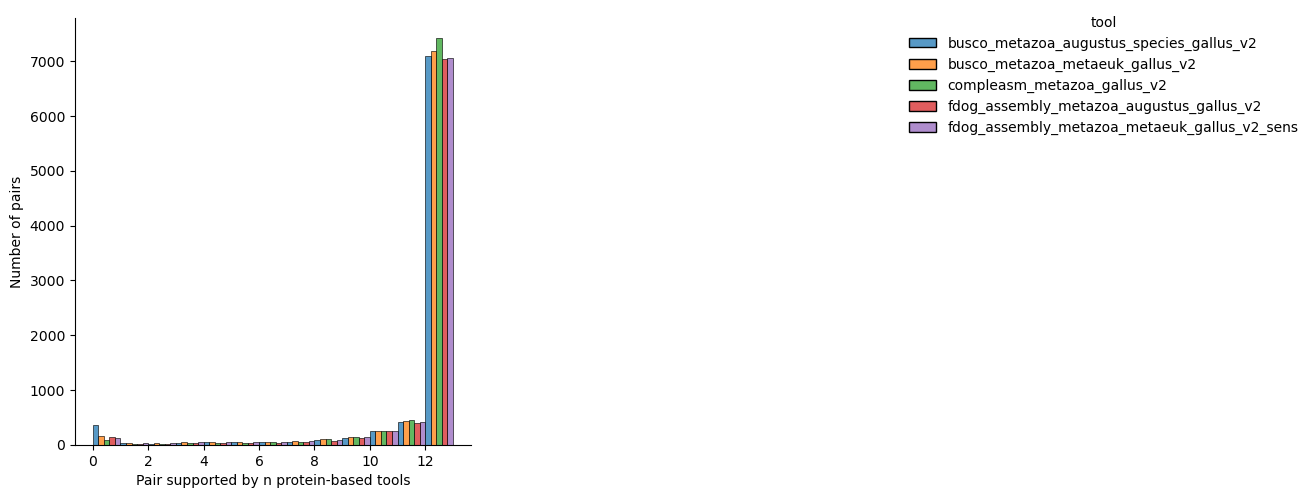

In [27]:
df_all = plot_frequency_all_evaluation_assembly_based(list_of_sets_ref, dict_of_sets, tools)

ValueError: AxesSubplot(0.125,0.11;0.775x0.77) has no legend attached.

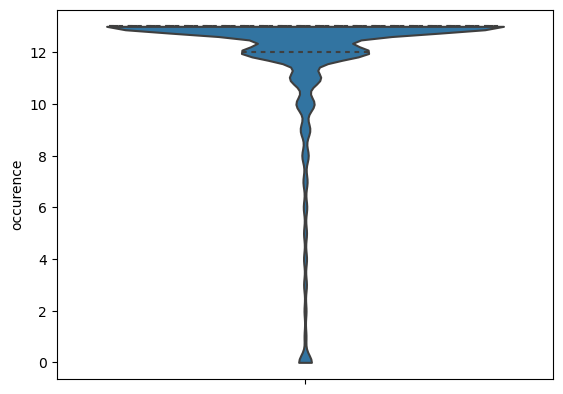

In [28]:
# as a violin plot
violin = sb.violinplot(data=df_all,y='occurence', hue='tool', cut=0, inner="quart")
sb.move_legend(violin, "upper left", bbox_to_anchor=(1, 1))
violin.set_title('Distribution of pairs supported by n protein-based tools')
#Set x-axis label
violin.set_xlabel('Benchmarked approach')
#Set y-axis label
violin.set_ylabel('Number of tools supporting an ortholog pair')
fig = violin.get_figure()
fig.savefig('comparison_with_other_qfo22_tools_pair_dictribution_violin.png', dpi=900, bbox_inches='tight')

In [29]:
#display(df_all)
df_filtered = df_all[df_all['occurence'] < 1].copy()
#display(df_filtered)
exclusive_pairs = df_filtered['pair'].copy()

In [30]:
def found_by_cutoff(df_occ, cutoff, tools):
    dict_sensitivity = {}
    occ_total = df_occ['tool'].value_counts()
    #display(occ_total)
    df_filtered = df_occ[df_occ['occurence'] >= cutoff].copy()
    occ = df_filtered['tool'].value_counts()
    #display(occ)
    tool_name = []
    orthologs = []
    orthologs_supported_by_n_tools = []
    fraction = []
    for tool in tools:
        print(tool)
        tool_name.append(tool)
        print(occ_total[tool])
        print(occ[tool])
        print(occ[tool]/occ_total[tool])
        orthologs.append(occ_total[tool])
        orthologs_supported_by_n_tools.append(occ[tool])
        fraction.append(occ[tool]/occ_total[tool])
    df_occ = pd.DataFrame({'Tool': tool_name, 'No_orthologs': orthologs, 'Orthologs_supported': orthologs_supported_by_n_tools, 'Fraction': fraction})
    return df_occ
    

In [31]:
found_by_cutoff(df_all, 2, tools)

busco_metazoa_augustus_species_gallus_v2
8588
8211
0.9561015370284117
busco_metazoa_metaeuk_gallus_v2
8621
8419
0.9765688435216332
compleasm_metazoa_gallus_v2
8714
8603
0.9872618774386045
fdog_assembly_metazoa_augustus_gallus_v2
8232
8078
0.9812925170068028
fdog_assembly_metazoa_metaeuk_gallus_v2_sens
8384
8226
0.9811545801526718


,Tool,No_orthologs,Orthologs_supported,Fraction
0,busco_metazoa_augustus_species_gallus_v2,8588,8211,0.956102
1,busco_metazoa_metaeuk_gallus_v2,8621,8419,0.976569
2,compleasm_metazoa_gallus_v2,8714,8603,0.987262
3,fdog_assembly_metazoa_augustus_gallus_v2,8232,8078,0.981293
4,fdog_assembly_metazoa_metaeuk_gallus_v2_sens,8384,8226,0.981155


In [32]:
found_by_cutoff(df_all, 6, tools)

busco_metazoa_augustus_species_gallus_v2
8588
8069
0.9395668374476013
busco_metazoa_metaeuk_gallus_v2
8621
8242
0.9560375826470247
compleasm_metazoa_gallus_v2
8714
8480
0.9731466605462474
fdog_assembly_metazoa_augustus_gallus_v2
8232
7969
0.9680515063168125
fdog_assembly_metazoa_metaeuk_gallus_v2_sens
8384
8041
0.9590887404580153


,Tool,No_orthologs,Orthologs_supported,Fraction
0,busco_metazoa_augustus_species_gallus_v2,8588,8069,0.939567
1,busco_metazoa_metaeuk_gallus_v2,8621,8242,0.956038
2,compleasm_metazoa_gallus_v2,8714,8480,0.973147
3,fdog_assembly_metazoa_augustus_gallus_v2,8232,7969,0.968052
4,fdog_assembly_metazoa_metaeuk_gallus_v2_sens,8384,8041,0.959089


In [33]:
# make stacked bar chart protein-based and assembly-based tools
def plot_stacked_bar(df, intervals, out_name, min_y = 100, max_y = 10000, w = 3.5, h = 4, log = True):
    display(df)
    interval_lists = []
    for i in intervals:
        interval_lists.append([])
    tools = df['tool'].unique()
    #print(tools)
    #print(interval_lists)
    for t in tools:
        last_i = 0
        counter = 0
        last_val = 0
        for i in intervals:
            list_int = interval_lists[counter]
            #if counter != len(intervals) - 1:
            list_int.append(len(df[(df['tool']== t) & (df['occurence'] <= i)]))
            counter += 1
            
    
    data_dict = {}
    last_i = 0
    counter = 0
    labels = []
    for i in intervals:
        name = str(last_i) + '-' + str(i)
        labels.append(name)
        data_dict[name] = interval_lists[counter]
        counter += 1
        last_i = i +1
    print(data_dict)
    #df_bar = pd.DataFrame(data_dict)
    #display(df_bar)
    plt.rcParams.update({'font.size': 12})
    fig, ax = plt.subplots()
    width = 0.5
    bottom = np.zeros(len(tools))
    if log == True:
        for lab, values in data_dict.items():
            print(values, bottom)
            delta = values.copy()
            for index in range(0,len(values)):
                delta[index] = values[index] - bottom[index]    
            p = ax.bar(tools, delta, width, label=lab, bottom=bottom, log = True)
            bottom = values
    else:
        for lab, values in data_dict.items():
            print(values, bottom)
            delta = values.copy()
            for index in range(0,len(values)):
                delta[index] = values[index] - bottom[index]  
            print(delta)
            p = ax.bar(tools, delta, width, label=lab, bottom=bottom)
            bottom = values
    fig.set_size_inches(w, h)
    ax.set_title("Orthologs shared with X other methods")
    ax.legend(loc='upper left', bbox_to_anchor=(1.05, 1))
    plt.ylim(min_y,max_y)
    plt.xticks(rotation=90)
    plt.show()
    fig.savefig(out_name, dpi=900, bbox_inches='tight')

,pair,occurence,tool
0,D7GXI5_Q9H269,13,busco_metazoa_augustus_species_gallus_v2
1,A7S9Q5_Q9NY12,11,busco_metazoa_augustus_species_gallus_v2
2,D2A4U6_O95801,13,busco_metazoa_augustus_species_gallus_v2
3,Q6DGP2_O95926,13,busco_metazoa_augustus_species_gallus_v2
4,Q9P2H3_A7S6M0,13,busco_metazoa_augustus_species_gallus_v2
...,...,...,...
42534,Q96JB5_Q9JLH7,13,fdog_assembly_metazoa_metaeuk_gallus_v2_sens
42535,Q5SWX8_A0A8I6AVP7,13,fdog_assembly_metazoa_metaeuk_gallus_v2_sens
42536,A0A1D5PZ86_Q8N5U6,13,fdog_assembly_metazoa_metaeuk_gallus_v2_sens
42537,P32780_Q66I03,13,fdog_assembly_metazoa_metaeuk_gallus_v2_sens


{'0-0': [354, 168, 91, 133, 127], '1-3': [435, 290, 156, 203, 248], '4-6': [562, 433, 289, 301, 389], '7-9': [826, 736, 586, 536, 667], '10-13': [8588, 8621, 8714, 8232, 8384]}
[354, 168, 91, 133, 127] [0. 0. 0. 0. 0.]
[435, 290, 156, 203, 248] [354, 168, 91, 133, 127]
[562, 433, 289, 301, 389] [435, 290, 156, 203, 248]
[826, 736, 586, 536, 667] [562, 433, 289, 301, 389]
[8588, 8621, 8714, 8232, 8384] [826, 736, 586, 536, 667]


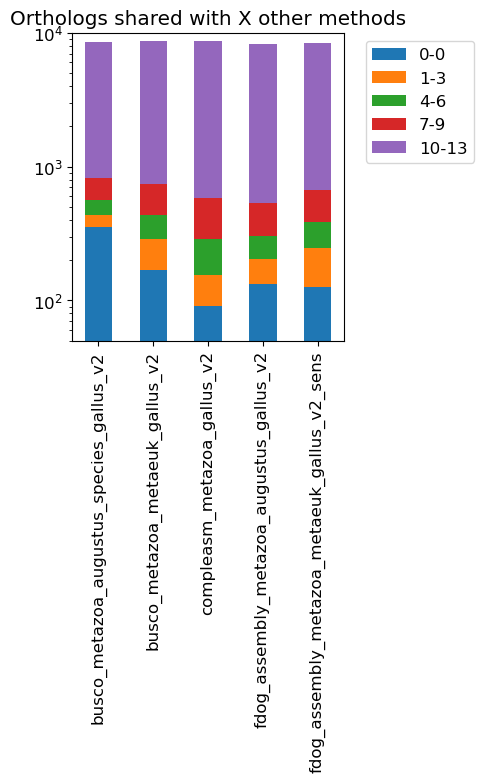

In [49]:
import matplotlib.pyplot as plt
plot_stacked_bar(df_all, [0,3,6,9,13], 'orthologs_shared_stacked_bar_plot_assembly_based_methods_status_dec_2025.svg', 50, 10000, 3.5, 4, True)

In [42]:
def plot_frequency_all_evaluation_protein_based(list_of_sets_ref, set_dict, tools):
    pair_list = []
    occurence_list = []
    tool_list = []
    counter_t = 0
    print(tools)
    for t in tools:
        test_set = set_dict[t]
        for i in test_set:
            occurence = 0
            counter_list = 0
            for set_ref in list_of_sets_ref:
                if counter_list == counter_t:
                    counter_list += 1
                    continue
                if i in set_ref:
                    occurence += 1
                counter_list += 1
            pair = list(i)
            pair_list.append('_'.join(pair))
            occurence_list.append(occurence)
            tool_list.append(t)
        counter_t += 1
    data_dict = {'pair': pair_list, 'occurence': occurence_list, 'tool': tool_list}
    df = pd.DataFrame(data_dict)
    return df

In [43]:
df_ref_tools = plot_frequency_all_evaluation_protein_based(list_of_sets_ref,dict_of_sets, tools_ref)
#display(df_ref_tools)
found_by_cutoff(df_ref_tools, 6, tools_ref)
found_by_cutoff(df_ref_tools, 2, tools_ref)

['bbh', 'domainoid', 'ensemble', 'hieranoid', 'inparanoid', 'metaphors', 'oma_pairs', 'orthoffgc', 'orthofinder', 'orthoinspector', 'panther', 'rsd', 'sonicparanoid']
bbh
8738
8645
0.9893568322270543
domainoid
8945
8788
0.982448295136948
ensemble
8168
7632
0.9343780607247796
hieranoid
8422
8370
0.9938256946093564
inparanoid
8487
8459
0.9967008365735831
metaphors
8979
8228
0.9163603964806771
oma_pairs
7973
7896
0.990342405618964
orthoffgc
8616
8478
0.983983286908078
orthofinder
9372
8858
0.9451557831839522
orthoinspector
9006
8867
0.9845658449922274
panther
8906
8462
0.9501459690096564
rsd
8606
8389
0.9747850336974204
sonicparanoid
9126
8860
0.9708525093140478
bbh
8738
8737
0.9998855573357748
domainoid
8945
8917
0.9968697596422582
ensemble
8168
7900
0.9671890303623898
hieranoid
8422
8414
0.9990501068629779
inparanoid
8487
8483
0.9995286909390833
metaphors
8979
8556
0.9528900768459739
oma_pairs
7973
7956
0.997867803837953
orthoffgc
8616
8602
0.9983751160631383
orthofinder
9372
9253
0.987

,Tool,No_orthologs,Orthologs_supported,Fraction
0,bbh,8738,8737,0.999886
1,domainoid,8945,8917,0.996870
2,ensemble,8168,7900,0.967189
3,hieranoid,8422,8414,0.999050
4,inparanoid,8487,8483,0.999529
5,metaphors,8979,8556,0.952890
6,oma_pairs,7973,7956,0.997868
7,orthoffgc,8616,8602,0.998375
8,orthofinder,9372,9253,0.987303
9,orthoinspector,9006,8998,0.999112


,pair,occurence,tool
0,D7GXI5_Q9H269,12,bbh
1,A7S9Q5_Q9NY12,10,bbh
2,O95801_D2A4U6,12,bbh
3,Q9P2H3_A7S6M0,12,bbh
4,Q6DGP2_O95926,12,bbh
...,...,...,...
113339,Q9IAA9_O00255,12,sonicparanoid
113340,Q5SWX8_A0A8I6AVP7,12,sonicparanoid
113341,A0A1D5PZ86_Q8N5U6,12,sonicparanoid
113342,Q66I03_P32780,12,sonicparanoid


{'0-0': [0, 8, 222, 5, 0, 360, 9, 4, 43, 1, 125, 28, 83], '1-3': [20, 86, 435, 24, 6, 614, 38, 54, 335, 40, 336, 124, 164], '4-6': [155, 220, 595, 71, 43, 842, 90, 203, 616, 231, 496, 278, 342], '7-9': [624, 767, 1015, 368, 363, 1327, 275, 679, 1226, 837, 934, 706, 953], '10-13': [8738, 8945, 8168, 8422, 8487, 8979, 7973, 8616, 9372, 9006, 8906, 8606, 9126]}
[0, 8, 222, 5, 0, 360, 9, 4, 43, 1, 125, 28, 83] [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[20, 86, 435, 24, 6, 614, 38, 54, 335, 40, 336, 124, 164] [0, 8, 222, 5, 0, 360, 9, 4, 43, 1, 125, 28, 83]
[155, 220, 595, 71, 43, 842, 90, 203, 616, 231, 496, 278, 342] [20, 86, 435, 24, 6, 614, 38, 54, 335, 40, 336, 124, 164]
[624, 767, 1015, 368, 363, 1327, 275, 679, 1226, 837, 934, 706, 953] [155, 220, 595, 71, 43, 842, 90, 203, 616, 231, 496, 278, 342]
[8738, 8945, 8168, 8422, 8487, 8979, 7973, 8616, 9372, 9006, 8906, 8606, 9126] [624, 767, 1015, 368, 363, 1327, 275, 679, 1226, 837, 934, 706, 953]


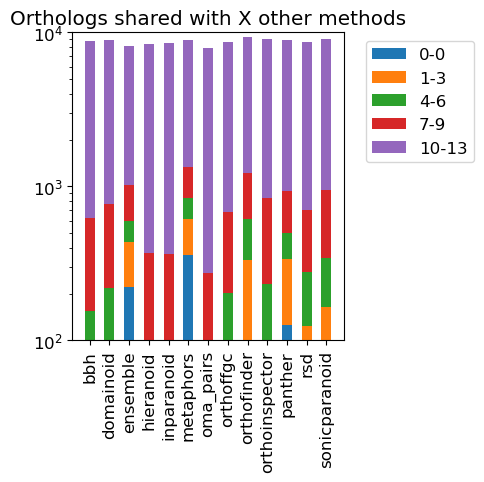

In [44]:
import matplotlib.pyplot as plt
plot_stacked_bar(df_ref_tools, [0,3,6,9,13], 'orthologs_shared_stacked_bar_plot_protein_based_methods.png')

,pair,occurence,tool
0,D7GXI5_Q9H269,12,bbh
1,A7S9Q5_Q9NY12,10,bbh
2,O95801_D2A4U6,12,bbh
3,Q9P2H3_A7S6M0,12,bbh
4,Q6DGP2_O95926,12,bbh
...,...,...,...
42534,Q96JB5_Q9JLH7,13,fdog_assembly_metazoa_metaeuk_gallus_v2_sens
42535,Q5SWX8_A0A8I6AVP7,13,fdog_assembly_metazoa_metaeuk_gallus_v2_sens
42536,A0A1D5PZ86_Q8N5U6,13,fdog_assembly_metazoa_metaeuk_gallus_v2_sens
42537,P32780_Q66I03,13,fdog_assembly_metazoa_metaeuk_gallus_v2_sens


{'0-0': [0, 8, 222, 5, 0, 360, 9, 4, 43, 1, 125, 28, 83, 354, 168, 91, 133, 127], '1-3': [20, 86, 435, 24, 6, 614, 38, 54, 335, 40, 336, 124, 164, 435, 290, 156, 203, 248], '4-6': [155, 220, 595, 71, 43, 842, 90, 203, 616, 231, 496, 278, 342, 562, 433, 289, 301, 389], '7-9': [624, 767, 1015, 368, 363, 1327, 275, 679, 1226, 837, 934, 706, 953, 826, 736, 586, 536, 667], '10-13': [8738, 8945, 8168, 8422, 8487, 8979, 7973, 8616, 9372, 9006, 8906, 8606, 9126, 8588, 8621, 8714, 8232, 8384]}
[0, 8, 222, 5, 0, 360, 9, 4, 43, 1, 125, 28, 83, 354, 168, 91, 133, 127] [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[20, 86, 435, 24, 6, 614, 38, 54, 335, 40, 336, 124, 164, 435, 290, 156, 203, 248] [0, 8, 222, 5, 0, 360, 9, 4, 43, 1, 125, 28, 83, 354, 168, 91, 133, 127]
[155, 220, 595, 71, 43, 842, 90, 203, 616, 231, 496, 278, 342, 562, 433, 289, 301, 389] [20, 86, 435, 24, 6, 614, 38, 54, 335, 40, 336, 124, 164, 435, 290, 156, 203, 248]
[624, 767, 1015, 368, 363, 1327, 275, 679, 1226, 837, 

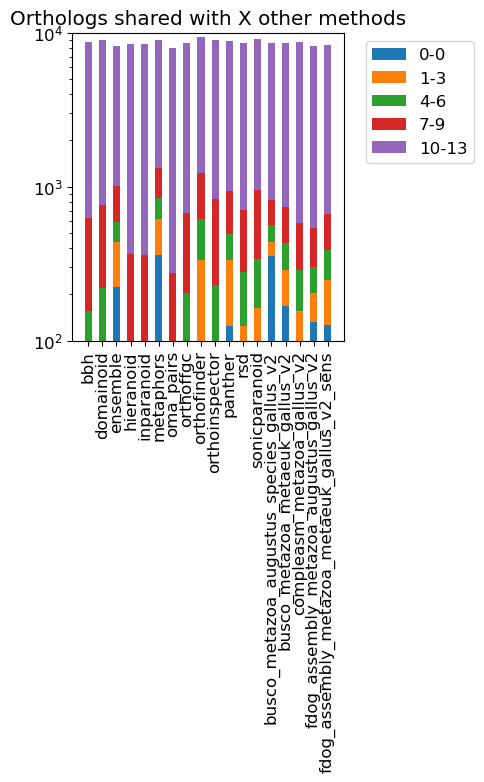

In [45]:
plot_stacked_bar(pd.concat([df_ref_tools, df_all]), [0,3,6,9,13], 'orthologs_shared_stacked_bar_plot_protein_based_methods.svg')

In [46]:
def found_by_less(df_occ, cutoff, tools):
    occ_total = df_occ['tool'].value_counts()
    display(occ_total)
    df_filtered = df_occ[df_occ['occurence'] <= cutoff].copy()
    occ = df_filtered['tool'].value_counts()
    display(occ)
    for tool in tools:
        print(tool)
        print(occ_total[tool])
        print(occ[tool])
        print(occ[tool]/occ_total[tool])
    return df_filtered

In [47]:
df_not_found = found_by_less(df_all, 0, tools)
df_not_found[['gene1', 'gene2']] = df_not_found['pair'].str.split('_', n=1, expand=True)
display(df_not_found)

compleasm_metazoa_gallus_v2                     8714
busco_metazoa_metaeuk_gallus_v2                 8621
busco_metazoa_augustus_species_gallus_v2        8588
fdog_assembly_metazoa_metaeuk_gallus_v2_sens    8384
fdog_assembly_metazoa_augustus_gallus_v2        8232
Name: tool, dtype: int64

busco_metazoa_augustus_species_gallus_v2        354
busco_metazoa_metaeuk_gallus_v2                 168
fdog_assembly_metazoa_augustus_gallus_v2        133
fdog_assembly_metazoa_metaeuk_gallus_v2_sens    127
compleasm_metazoa_gallus_v2                      91
Name: tool, dtype: int64

busco_metazoa_augustus_species_gallus_v2
8588
354
0.041220307405682347
busco_metazoa_metaeuk_gallus_v2
8621
168
0.01948729845725554
compleasm_metazoa_gallus_v2
8714
91
0.010442965343126004
fdog_assembly_metazoa_augustus_gallus_v2
8232
133
0.016156462585034014
fdog_assembly_metazoa_metaeuk_gallus_v2_sens
8384
127
0.015147900763358778


,pair,occurence,tool,gene1,gene2
38,A0A3Q2U9F6_Q99426,0,busco_metazoa_augustus_species_gallus_v2,A0A3Q2U9F6,Q99426
66,Q9VRQ8_Q15050,0,busco_metazoa_augustus_species_gallus_v2,Q9VRQ8,Q15050
69,Q9NX38_Q28G67-1,0,busco_metazoa_augustus_species_gallus_v2,Q9NX38,Q28G67-1
73,Q16739_Q21053,0,busco_metazoa_augustus_species_gallus_v2,Q16739,Q21053
95,Q7Z3J2_A8WFK3,0,busco_metazoa_augustus_species_gallus_v2,Q7Z3J2,A8WFK3
...,...,...,...,...,...
42054,Q7TPK6_Q9BRG1,0,fdog_assembly_metazoa_metaeuk_gallus_v2_sens,Q7TPK6,Q9BRG1
42125,Q7JYX5,0,fdog_assembly_metazoa_metaeuk_gallus_v2_sens,Q7JYX5,None
42277,P35345_O43148,0,fdog_assembly_metazoa_metaeuk_gallus_v2_sens,P35345,O43148
42343,Q9VXN8,0,fdog_assembly_metazoa_metaeuk_gallus_v2_sens,Q9VXN8,None


# Human Proteom benchmark

In [54]:
tools_ref = ['bbh', 'domainoid', 'ensemble', 'hieranoid', 'inparanoid', 'metaphors', 'oma_pairs', 'orthoffgc', 'orthofinder', 'orthoinspector', 'panther', 'rsd', 'sonicparanoid']
tools_human_proteom = ['fdog_assembly_human_proteom_augustus_5t_cov_50', 'fdog_assembly_human_proteom_metaeuk_sens_5t_cov_50']
path = '../../results/qfo_input/human_proteom/'

In [55]:
list_of_sets_ref = []
dict_of_sets = {}
for i in tools_ref:
    #pairs_set = create_set_of_sets(path + i + '.tsv')
    #pairs_set = create_set_of_sets(path + i + '_5t.tsv')
    pairs_set = create_set_of_sets(path + i + '_5t.tsv')
    list_of_sets_ref.append(pairs_set)
    dict_of_sets[i] = pairs_set

6027
10002
21850
7223
8366
10256
9445
6071
9651
7832
12511
6069
11938


In [56]:
intersection_all = set.intersection(*list_of_sets_ref)
print(len(list_of_sets_ref))
print(len(intersection_all))

13
3550


In [57]:
list_of_sets = []
for t in tools_human_proteom:
    print(t)
    #pairs_set = create_set_of_sets(path + t + '.tsv')
    pairs_set = create_set_of_sets(path + t + '.tsv')
    list_of_sets.append(pairs_set)
    dict_of_sets[t] = pairs_set

fdog_assembly_human_proteom_augustus_5t_cov_50
7374
fdog_assembly_human_proteom_metaeuk_sens_5t_cov_50
7613


In [58]:
for i in range(len(tools_human_proteom)):
    print(tools_human_proteom[i])
    intersection_size = len(list_of_sets[i].intersection(intersection_all))
    not_found = intersection_all - list_of_sets[i] 
    print(intersection_size)
    print(intersection_size/len(intersection_all))

fdog_assembly_human_proteom_augustus_5t_cov_50
3095
0.8718309859154929
fdog_assembly_human_proteom_metaeuk_sens_5t_cov_50
3164
0.8912676056338028


In [59]:
import pandas as pd
# Investigation of those cases
#print(not_found)
# I tested a few cases and recognized that some of those genes are in the overlap table 
#load overlap table to find out how many cases are really present in the table and 'just a cut-off' issues -> also find out the range of overlaps
fa_augustus_human_proteom = pd.read_csv('../overlap_tables/fdog_ass_human_proteom_augustus_overlap_gff_files_rat_nema.tsv', delimiter='\t')
df_reduced = fa_augustus_human_proteom[['GeneID','uniprotID']].copy()
geneids = df_reduced['GeneID'].tolist()
uniprot = df_reduced['uniprotID'].tolist()
print(len(geneids))
print(len(uniprot))
pairs_table = set()
for i in range(0,len(geneids)):
    pairs = frozenset([geneids[i], uniprot[i]])
    pairs_table.add(pairs)
print(len(pairs_table))
in_overlap_table = pairs_table.intersection(not_found)
# Genes found in overlap table but were kicked out due to overlap cutoff
print(len(in_overlap_table))
print(len(not_found))
not_found_no_overlap = not_found - in_overlap_table
#print(not_found_no_overlap)

# wie viele davon sind von welcher Spezies?? (bis jetzt alle Fälle die ich raus gezogen haben von Ratte)
# Q6PEY1 -> huge lcr coverage 

67272
67272
41144
104
386
{frozenset({'P59241', 'O14965'}), frozenset({'A7RY32', 'Q8TBP6'}), frozenset({'P62260', 'P62258'}), frozenset({'Q9H2W6', 'A7S125'}), frozenset({'Q5XIU5', 'Q92530'}), frozenset({'Q4KLG3', 'Q8N300'}), frozenset({'F1LND0', 'Q07092'}), frozenset({'Q4QQU6', 'O75940'}), frozenset({'Q2M1Z3', 'D4A987'}), frozenset({'Q63798', 'Q9UL46'}), frozenset({'D3ZRL5', 'Q9UJT0'}), frozenset({'O15042', 'A0A8I5ZXP5'}), frozenset({'P63220', 'A7S8Q0'}), frozenset({'F2Z3S9', 'P10589'}), frozenset({'P17252', 'P05696'}), frozenset({'Q5VVX9', 'F1M158'}), frozenset({'Q5U2Q4', 'Q8N5Y8'}), frozenset({'O00591', 'O09028'}), frozenset({'A7S946', 'O75940'}), frozenset({'A7SG14', 'Q5VVB8'}), frozenset({'P16233', 'P27657'}), frozenset({'A6NKF7', 'D4AAB3'}), frozenset({'A7S9G8', 'Q15390'}), frozenset({'G3V6W6', 'P62333'}), frozenset({'A7SJL7', 'O75072'}), frozenset({'Q8N4N8', 'Q5XI51'}), frozenset({'Q13310', 'G3V9N0'}), frozenset({'P05505', 'P00414'}), frozenset({'Q6UWI2', 'Q6P9X9'}), frozenset({'

In [61]:
df_fdog_ass_human_proteom = plot_frequency(list_of_sets_ref, dict_of_sets["fdog_assembly_human_proteom_augustus_5t_cov_50"])

7374
7374


In [62]:
df_all = plot_frequency_all_evaluation_protein_based(list_of_sets_ref, dict_of_sets, tools_human_proteom)

['fdog_assembly_human_proteom_augustus_5t_cov_50', 'fdog_assembly_human_proteom_metaeuk_sens_5t_cov_50']


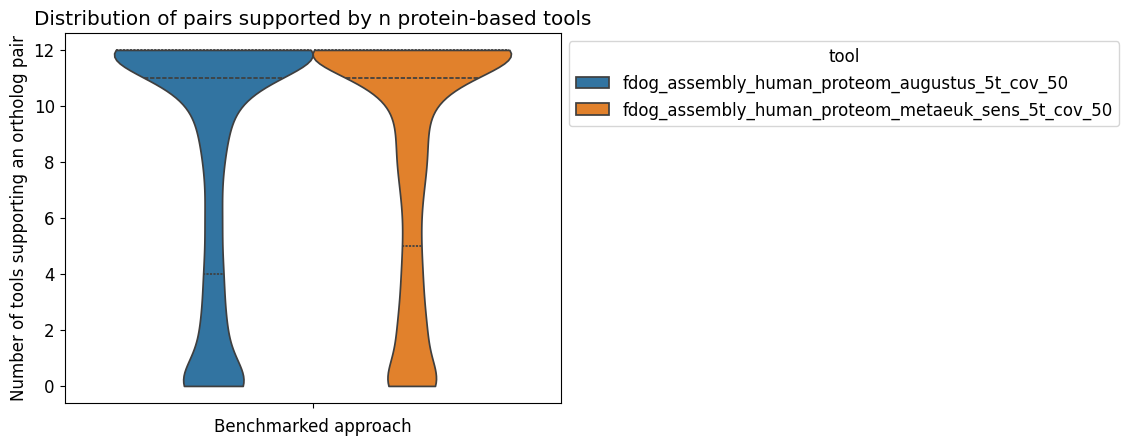

In [63]:
# as a violin plot
violin = sb.violinplot(data=df_all,y='occurence', hue='tool', cut=0, inner="quart")
sb.move_legend(violin, "upper left", bbox_to_anchor=(1, 1))
violin.set_title('Distribution of pairs supported by n protein-based tools')
#Set x-axis label
violin.set_xlabel('Benchmarked approach')
#Set y-axis label
violin.set_ylabel('Number of tools supporting an ortholog pair')
fig = violin.get_figure()
fig.savefig('comparison_with_other_qfo22_tools_pair_dictribution_violin_human_proteom_5g.png', dpi=900, bbox_inches='tight')

In [64]:
found_by_cutoff(df_all, 2, tools_human_proteom)

fdog_assembly_human_proteom_augustus_5t_cov_50
7374
6131
0.8314347708163818
fdog_assembly_human_proteom_metaeuk_sens_5t_cov_50
7613
6565
0.8623407329567845


,Tool,No_orthologs,Orthologs_supported,Fraction
0,fdog_assembly_human_proteom_augustus_5t_cov_50,7374,6131,0.831435
1,fdog_assembly_human_proteom_metaeuk_sens_5t_co...,7613,6565,0.862341


In [65]:
df_ass_occ = found_by_cutoff(df_all, 2, tools_human_proteom)

fdog_assembly_human_proteom_augustus_5t_cov_50
7374
6131
0.8314347708163818
fdog_assembly_human_proteom_metaeuk_sens_5t_cov_50
7613
6565
0.8623407329567845


In [66]:
df_not_found = found_by_less(df_all, 0, tools_human_proteom)
df_not_found[['gene1', 'gene2']] = df_not_found['pair'].str.split('_', n=1, expand=True)
display(df_not_found)

tool
fdog_assembly_human_proteom_metaeuk_sens_5t_cov_50    7613
fdog_assembly_human_proteom_augustus_5t_cov_50        7374
Name: count, dtype: int64

tool
fdog_assembly_human_proteom_augustus_5t_cov_50        919
fdog_assembly_human_proteom_metaeuk_sens_5t_cov_50    710
Name: count, dtype: int64

fdog_assembly_human_proteom_augustus_5t_cov_50
7374
919
0.12462706807702739
fdog_assembly_human_proteom_metaeuk_sens_5t_cov_50
7613
710
0.09326152633652962


,pair,occurence,tool,gene1,gene2
8,A0A8I5ZKS7_Q8TF20,0,fdog_assembly_human_proteom_augustus_5t_cov_50,A0A8I5ZKS7,Q8TF20
19,A0A8I6ASC2_Q8N9Z0,0,fdog_assembly_human_proteom_augustus_5t_cov_50,A0A8I6ASC2,Q8N9Z0
36,A7SCZ0_Q8TC57,0,fdog_assembly_human_proteom_augustus_5t_cov_50,A7SCZ0,Q8TC57
37,O75038_A7SDH9,0,fdog_assembly_human_proteom_augustus_5t_cov_50,O75038,A7SDH9
38,Q8NEG0_D3ZUI0,0,fdog_assembly_human_proteom_augustus_5t_cov_50,Q8NEG0,D3ZUI0
...,...,...,...,...,...
14958,A0A8I5ZTI4_O43361,0,fdog_assembly_human_proteom_metaeuk_sens_5t_co...,A0A8I5ZTI4,O43361
14968,Q10471_A7T8A0,0,fdog_assembly_human_proteom_metaeuk_sens_5t_co...,Q10471,A7T8A0
14974,A0A8I5ZNL9_Q8TF08,0,fdog_assembly_human_proteom_metaeuk_sens_5t_co...,A0A8I5ZNL9,Q8TF08
14981,A7RQJ1_P01137,0,fdog_assembly_human_proteom_metaeuk_sens_5t_co...,A7RQJ1,P01137


In [67]:
# How do the reference tools overlap with each other?
for ref in range(len(tools_ref)):
    #print(ref)
    print(tools_ref[ref])
    ref_list = list_of_sets_ref[:ref] + list_of_sets_ref[ref+1:]
    intersection_all_others = set.intersection(*ref_list)
    intersection_size = len(list_of_sets_ref[ref].intersection(intersection_all_others))
    print(intersection_size)
    print(len(intersection_all_others))
    print(intersection_size/len(intersection_all_others))

bbh
3550
3561
0.9969109800617804
domainoid
3550
3550
1.0
ensemble
3550
4006
0.8861707438841737
hieranoid
3550
3593
0.9880322849986084
inparanoid
3550
3554
0.9988745075970737
metaphors
3550
3845
0.9232769830949284
oma_pairs
3550
3621
0.9803921568627451
orthoffgc
3550
3647
0.9734027968193035
orthofinder
3550
3560
0.9971910112359551
orthoinspector
3550
3559
0.9974711997752178
panther
3550
3645
0.9739368998628258
rsd
3550
3697
0.9602380308358128
sonicparanoid
3550
3550
1.0


In [68]:
df_ref_tools = plot_frequency_all_evaluation_protein_based(list_of_sets_ref,dict_of_sets, tools_ref)
#display(df_ref_tools)
#found_by_cutoff(df_ref_tools, 6, tools_ref)
df_occ = found_by_cutoff(df_ref_tools, 2, tools_ref)

['bbh', 'domainoid', 'ensemble', 'hieranoid', 'inparanoid', 'metaphors', 'oma_pairs', 'orthoffgc', 'orthofinder', 'orthoinspector', 'panther', 'rsd', 'sonicparanoid']
bbh
6027
6013
0.9976771196283392
domainoid
10002
8303
0.830133973205359
ensemble
21850
7705
0.3526315789473684
hieranoid
7223
6642
0.9195625086529143
inparanoid
8366
7398
0.8842935692087018
metaphors
10256
7457
0.7270865834633385
oma_pairs
9445
7234
0.7659078877713076
orthoffgc
6071
5888
0.96985669576676
orthofinder
9651
8473
0.8779401098331779
orthoinspector
7832
7656
0.9775280898876404
panther
12511
8358
0.6680521141395572
rsd
6069
5771
0.950898006261328
sonicparanoid
11938
8147
0.6824426202043894


,Tool,No_orthologs,Orthologs_supported,Fraction
0,fdog_assembly_human_proteom_augustus_5t_cov_50,7374,6131,0.831435
1,fdog_assembly_human_proteom_metaeuk_sens_5t_co...,7613,6565,0.862341
0,bbh,6027,6013,0.997677
1,domainoid,10002,8303,0.830134
2,ensemble,21850,7705,0.352632
3,hieranoid,7223,6642,0.919563
4,inparanoid,8366,7398,0.884294
5,metaphors,10256,7457,0.727087
6,oma_pairs,9445,7234,0.765908
7,orthoffgc,6071,5888,0.969857


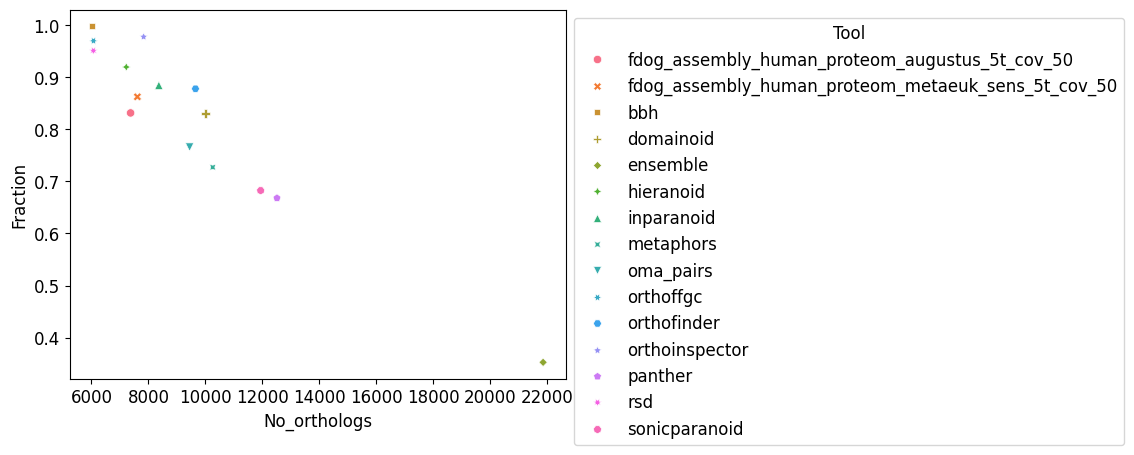

In [69]:
df_all_occ = pd.concat([df_ass_occ, df_occ])
display(df_all_occ)
plot = sb.scatterplot(data= df_all_occ, x='No_orthologs', y='Fraction', hue='Tool', style='Tool')
sb.move_legend(plot, "upper left", bbox_to_anchor=(1, 1))

,pair,occurence,tool
0,Q63619_Q99807,12,fdog_assembly_human_proteom_augustus_5t_cov_50
1,A0A8I5ZXK2_Q96A84,10,fdog_assembly_human_proteom_augustus_5t_cov_50
2,Q5XI96_Q5TBB1,12,fdog_assembly_human_proteom_augustus_5t_cov_50
3,Q6IRI9_Q99518,12,fdog_assembly_human_proteom_augustus_5t_cov_50
4,Q96RN5_G3V684,12,fdog_assembly_human_proteom_augustus_5t_cov_50
...,...,...,...
14982,P24298_A7T0S1,9,fdog_assembly_human_proteom_metaeuk_sens_5t_co...
14983,A7S3F0_A6NM36,0,fdog_assembly_human_proteom_metaeuk_sens_5t_co...
14984,A0A8I6GKR1_Q96A23,12,fdog_assembly_human_proteom_metaeuk_sens_5t_co...
14985,F1LSG7_P21802,12,fdog_assembly_human_proteom_metaeuk_sens_5t_co...


{'0-0': [919, 710], '1-3': [1715, 1607], '4-6': [2243, 2195], '7-9': [2882, 3065], '10-13': [7374, 7613]}
[919, 710] [0. 0.]
[1715, 1607] [919, 710]
[2243, 2195] [1715, 1607]
[2882, 3065] [2243, 2195]
[7374, 7613] [2882, 3065]


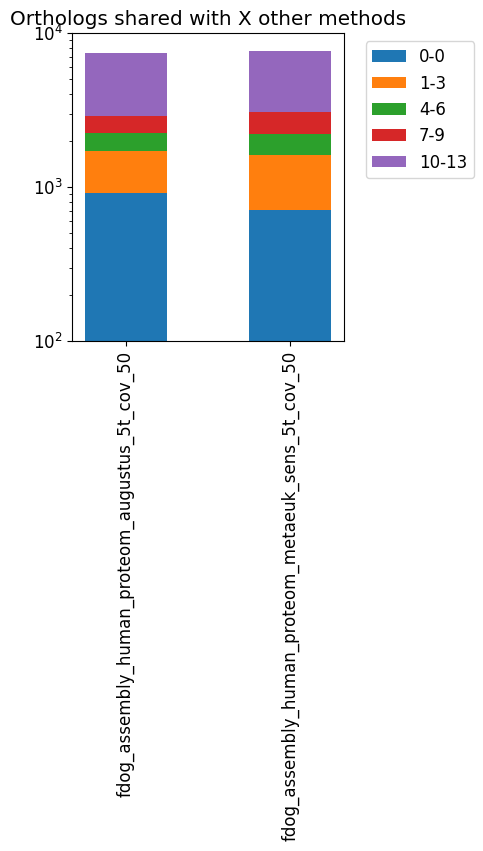

In [70]:
import matplotlib.pyplot as plt
plot_stacked_bar(df_all, [0,3,6,9,13], 'orthologs_shared_stacked_bar_plot_assembly_based_methods_human_proteom.svg')

,pair,occurence,tool
0,Q63619_Q99807,12,bbh
1,A7RZ97_Q96AE7,11,bbh
2,A0A8I5ZXK2_Q96A84,10,bbh
3,Q15072_A0A8I6GFW5,8,bbh
4,Q5XI96_Q5TBB1,12,bbh
...,...,...,...
14982,P24298_A7T0S1,9,fdog_assembly_human_proteom_metaeuk_sens_5t_co...
14983,A7S3F0_A6NM36,0,fdog_assembly_human_proteom_metaeuk_sens_5t_co...
14984,A0A8I6GKR1_Q96A23,12,fdog_assembly_human_proteom_metaeuk_sens_5t_co...
14985,F1LSG7_P21802,12,fdog_assembly_human_proteom_metaeuk_sens_5t_co...


{'0-0': [4, 478, 12388, 455, 0, 2164, 1544, 109, 475, 73, 2530, 177, 3243, 919, 710], '1-3': [73, 2496, 15509, 788, 1431, 3736, 2897, 337, 2229, 488, 5386, 490, 4468, 1715, 1607], '4-6': [326, 3476, 16382, 1175, 2035, 4486, 3504, 595, 3208, 1330, 6345, 731, 5416, 2243, 2195], '7-9': [833, 4732, 17224, 2044, 3107, 5433, 4326, 1056, 4407, 2576, 7402, 1124, 6669, 2882, 3065], '10-13': [6027, 10002, 21850, 7223, 8366, 10256, 9445, 6071, 9651, 7832, 12511, 6069, 11938, 7374, 7613]}
[4, 478, 12388, 455, 0, 2164, 1544, 109, 475, 73, 2530, 177, 3243, 919, 710] [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[4.0, 478.0, 12388.0, 455.0, 0.0, 2164.0, 1544.0, 109.0, 475.0, 73.0, 2530.0, 177.0, 3243.0, 919.0, 710.0]
[73, 2496, 15509, 788, 1431, 3736, 2897, 337, 2229, 488, 5386, 490, 4468, 1715, 1607] [4, 478, 12388, 455, 0, 2164, 1544, 109, 475, 73, 2530, 177, 3243, 919, 710]
[69, 2018, 3121, 333, 1431, 1572, 1353, 228, 1754, 415, 2856, 313, 1225, 796, 897]
[326, 3476, 16382, 1175, 2035, 4486, 3504

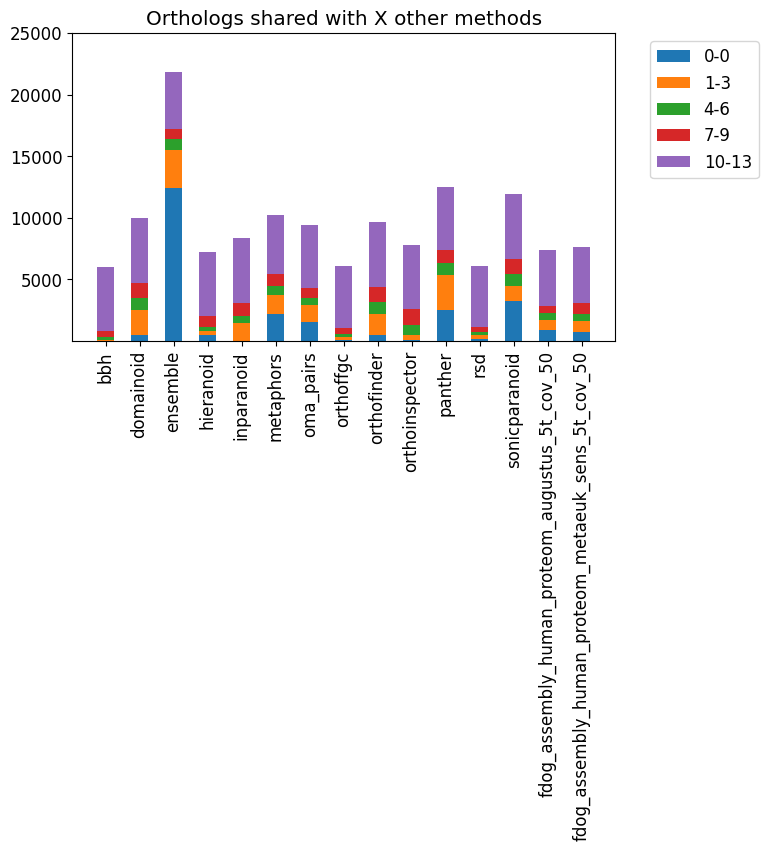

In [71]:
import matplotlib.pyplot as plt
plot_stacked_bar(pd.concat([df_ref_tools, df_all]), [0,3,6,9,13], 'orthologs_shared_stacked_bar_plot_all_methods_human_proteom.svg', 1,25000, 7,4, False)